In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing import image


2022-08-02 20:09:08.745329: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


#### Create file locations for all datasets

In [2]:
original_dataset_dir = '/home/jordan/Downloads/kaggle_original_data'

base_dir = '/home/jordan/Downloads/cats_and_dogs_small'
#os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

#### Split data up into training, validation and testing


In [3]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

### Create model architecture 

In [14]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (150,150,3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [15]:

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Rescale and augment data inputs and sort into batches

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/home/jordan/anaconda3/envs/Basic/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 12s 116ms/step - loss: 0.5205 - accuracy: 0.7575 - val_loss: 0.5097 - val_accuracy: 0.7840


### Visualize the augmented data

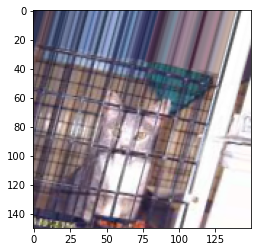

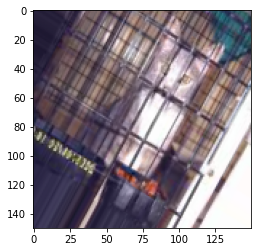

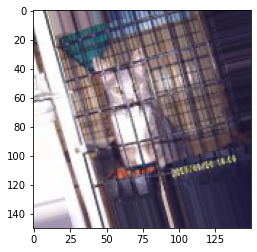

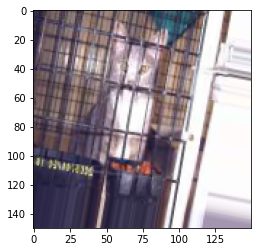

In [7]:
datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[32]

## Read image and resize
img = image.load_img(img_path, target_size=(150, 150))

## Convert to numpy array (150,150,3)
x = image.img_to_array(img)

## Reshape to (1,150,150,3)
x = x.reshape((1,) + x.shape)

## Generate batches of augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break


### Train model

In [23]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5610 - accuracy: 0.7350 - val_loss: 0.5218 - val_accuracy: 0.7500
Epoch 2/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5907 - accuracy: 0.7370 - val_loss: 0.4872 - val_accuracy: 0.7820
Epoch 3/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5323 - accuracy: 0.7540 - val_loss: 0.8217 - val_accuracy: 0.7480
Epoch 4/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5895 - accuracy: 0.7210 - val_loss: 0.5374 - val_accuracy: 0.7340
Epoch 5/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5914 - accuracy: 0.7320 - val_loss: 0.7947 - val_accuracy: 0.7540
Epoch 6/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5671 - accuracy: 0.7500 - val_loss: 0.6764 - val_accuracy: 0.7480
Epoch 7/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5344 - accuracy: 0.7490 - val_loss: 0.5178 - val_accuracy: 0.7660

In [9]:
model.save('cats_and_dogs_small_2.h5')

### Produce training metric graphs

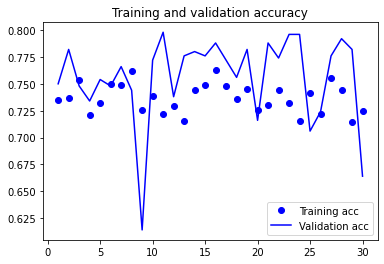

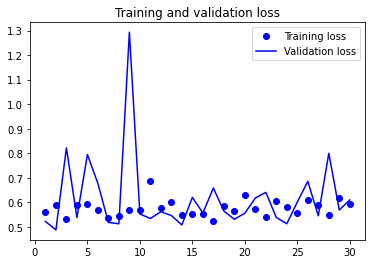

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()